### Keras Implementation

In [2]:
from tensorflow.keras.layers import Input, Dense, ReLU, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model

In [3]:
input_layer = Input(shape=(28,28))

x = Flatten()(input_layer)
x = Dense(units=256)(x)
x = ReLU()(x)
x = Dense(units=64)(x)
x = ReLU()(x)

output_layer = Dense(units=10, activation='softmax')(x)

2023-01-14 07:35:34.812172: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-14 07:35:34.900466: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-14 07:35:34.901241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-14 07:35:34.902884: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
mlp_keras = Model(inputs=input_layer, outputs=output_layer)

### Summary of the Keras model

In [5]:
mlp_keras.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650   

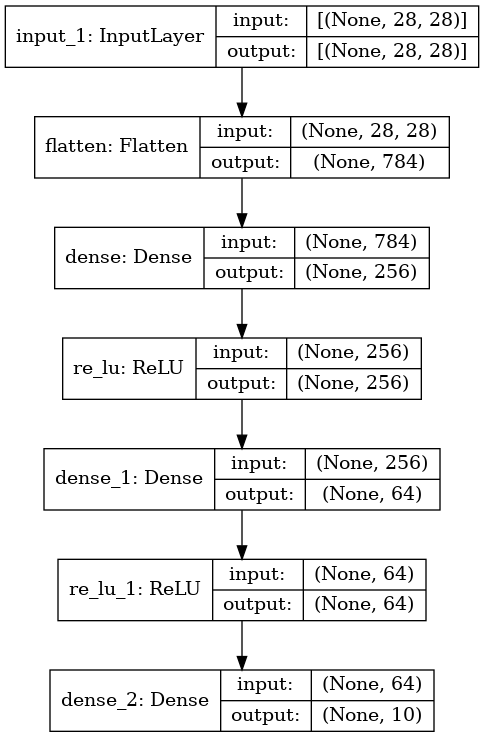

In [6]:
plot_model(mlp_keras, show_shapes=True)

### Dataset Preparation for Keras Model

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [8]:
print('Original :\n', y_train[:5])
print()

y_train = to_categorical(y_train, num_classes=10)

print('One-hot encoded :\n', y_train[:5])

Original :
 [5 0 4 1 9]

One-hot encoded :
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Train the Keras Model

In [9]:
mlp_keras.compile(loss='categorical_crossentropy', optimizer='adam')
mlp_keras.fit(X_train, y_train, epochs=10, batch_size=32)

2023-01-14 07:35:43.806273: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4139
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3249
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2117
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1562
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1354
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1142
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1045
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0955
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0850
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0741


### PyTorch Implementation

In [10]:
! pip install torchinfo
! pip install torchview

In [11]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from tqdm import tqdm

from torchinfo import summary
from torchview import draw_graph

In [12]:
class MLP_Pytorch(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense0 = nn.Linear(in_features=784, out_features=256)
        self.dense1 = nn.Linear(in_features=256, out_features=64)
        self.dense2 = nn.Linear(in_features=64, out_features=10)
        
    def forward(self, x):
        x = x.reshape(x.shape[0], 28*28)
        x = F.relu(self.dense0(x))
        x = F.relu(self.dense1(x))
        x = self.dense2(x)
        return x

In [13]:
mlp_pytorch = MLP_Pytorch().to(device='cuda')

### Summary of the PyTorch Model

In [14]:
summary(mlp_pytorch, input_size=(32,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
MLP_Pytorch                              [32, 10]                  --
├─Linear: 1-1                            [32, 256]                 200,960
├─Linear: 1-2                            [32, 64]                  16,448
├─Linear: 1-3                            [32, 10]                  650
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
Total mult-adds (M): 6.98
Input size (MB): 0.10
Forward/backward pass size (MB): 0.08
Params size (MB): 0.87
Estimated Total Size (MB): 1.06

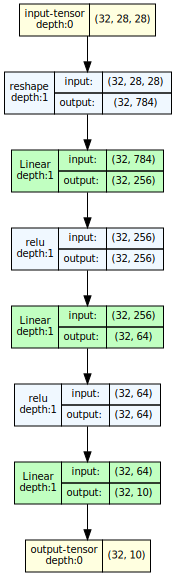

In [15]:
model_graph = draw_graph(mlp_pytorch, input_size=(32,28,28))
model_graph.visual_graph

### Dataset Preparation for PyTorch Model

In [16]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset  = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [17]:
print(train_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [18]:
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [19]:
sample_images = iter(train_loader)
images, labels = next(sample_images)

print(images.shape)
print(labels)

torch.Size([32, 1, 28, 28])
tensor([2, 3, 1, 6, 3, 1, 4, 8, 3, 0, 0, 0, 1, 0, 8, 3, 7, 8, 4, 4, 8, 2, 2, 9,
        5, 9, 7, 7, 2, 7, 9, 3])


### Train the PyTorch Model

In [20]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_pytorch.parameters(), lr=0.001)

In [21]:
def train(model, optimizer, loss_function, train_loader, epochs):
    
    for epoch in range(epochs):
        epoch_loss = 0
        for batch, (images, labels) in tqdm(enumerate(train_loader), total=len(train_loader)):
            
            # Send data to cuda
            images = images.to(device='cuda')
            labels = labels.to(device='cuda')
            
            # Forward propagation
            preds = model(images)
            loss = loss_function(preds, labels)
            epoch_loss += loss
            
            # Backward propagation
            optimizer.zero_grad()
            loss.backward()
            
            # Update weights (gradient descent)
            optimizer.step()
        
        epoch_loss = epoch_loss/len(train_loader)
        
        # Printing out the average loss within an epoch
        print(f'Epoch: {epoch} | Loss: {epoch_loss}')
    
    return model

In [22]:
mlp_pytorch = train(mlp_pytorch, optimizer, loss_function, train_loader, epochs=10)

100%|██████████| 1875/1875 [00:09<00:00, 204.85it/s]


Epoch: 0 | Loss: 0.25911563634872437


100%|██████████| 1875/1875 [00:08<00:00, 210.68it/s]


Epoch: 1 | Loss: 0.10056023299694061


100%|██████████| 1875/1875 [00:09<00:00, 195.15it/s]


Epoch: 2 | Loss: 0.06799449026584625


100%|██████████| 1875/1875 [00:08<00:00, 211.98it/s]


Epoch: 3 | Loss: 0.05138638615608215


100%|██████████| 1875/1875 [00:09<00:00, 208.19it/s]


Epoch: 4 | Loss: 0.037134282290935516


100%|██████████| 1875/1875 [00:09<00:00, 193.67it/s]


Epoch: 5 | Loss: 0.030461031943559647


100%|██████████| 1875/1875 [00:09<00:00, 207.02it/s]


Epoch: 6 | Loss: 0.02643757313489914


100%|██████████| 1875/1875 [00:08<00:00, 215.71it/s]


Epoch: 7 | Loss: 0.020655328407883644


100%|██████████| 1875/1875 [00:09<00:00, 197.92it/s]


Epoch: 8 | Loss: 0.018952488899230957


100%|██████████| 1875/1875 [00:09<00:00, 202.93it/s]

Epoch: 9 | Loss: 0.01431843638420105
